In [1]:
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from astropy.io import fits
import glob
from astropy.time import Time

In [2]:
files = glob.glob('20240219_hp4/*.fits.gz')
files.sort()

filename = files[-1]
with fits.open(filename) as hdul:  # open a FITS file
    data = hdul[1].data  # assume the first extension is an image
    header = hdul[1].header

In [3]:
data.shape

(3072,)

In [4]:
all_maps = []
jds = []
for filename in files:
    with fits.open(filename) as hdul:
        data = hdul[1].data  # assume the first extension is an image
        header = hdul[1].header
        all_maps.append(data["clouds"])
        jds.append(header["JD"])

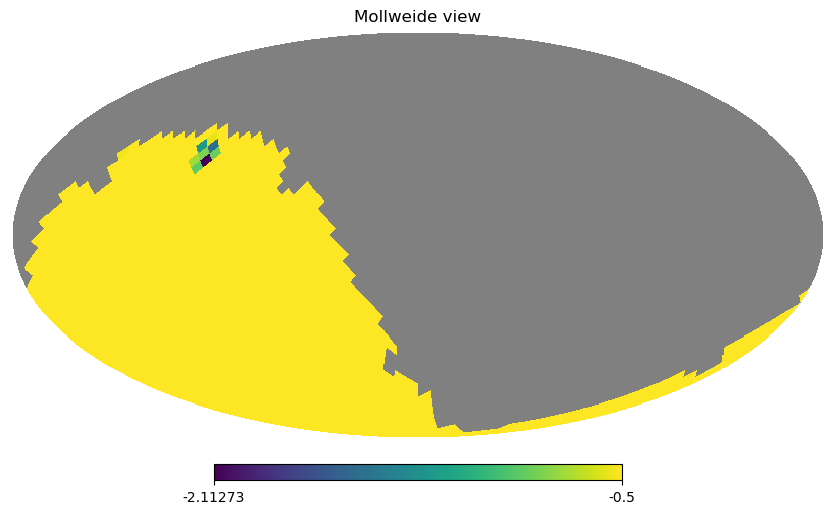

In [9]:
hp.mollview(all_maps[0], nest=True, max=-0.5)

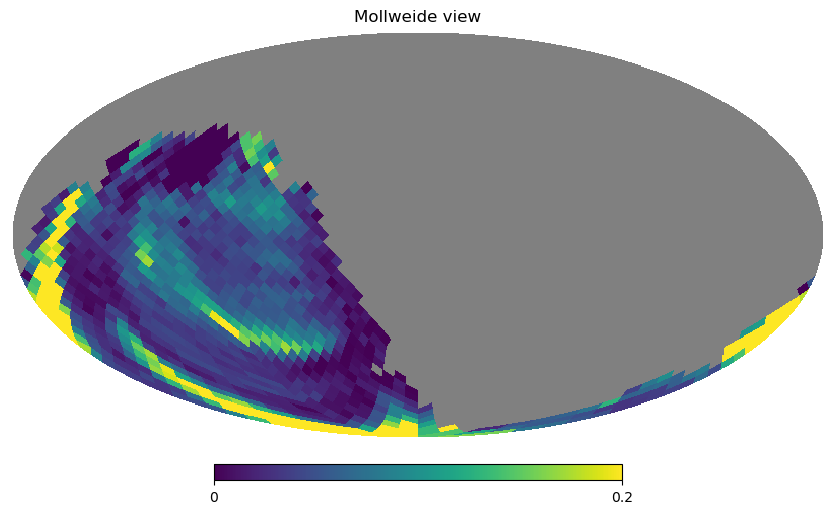

In [10]:
hp.mollview(all_maps[20], nest=True, min=0, max=0.2)

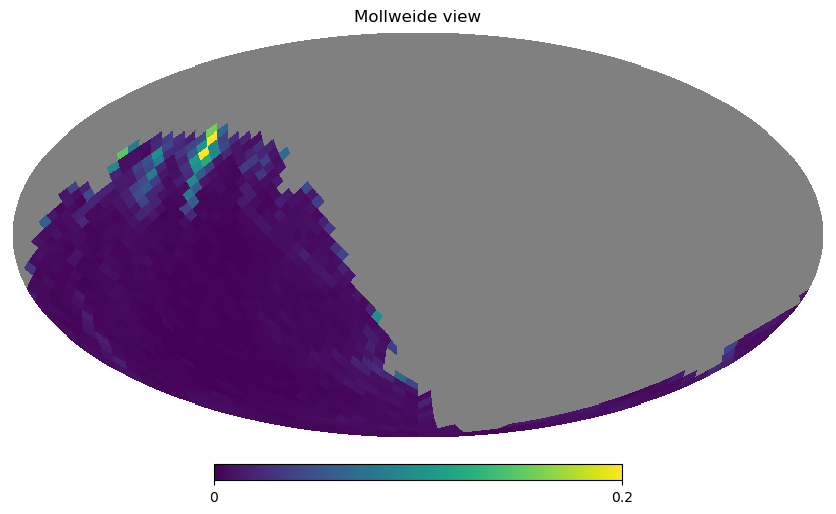

In [6]:
hp.mollview(data["sigma"], nest=True, min=0, max=0.2)

In [8]:
jd1 = 2460360.569450651
jd2 = 2460360.769421706

In [7]:
header["JD"]

2460360.569450651

In [11]:
ack = Time(jd1, format="jd")
ack.mjd

np.float64(60360.06945065083)

In [12]:
from rubin_scheduler.utils import SURVEY_START_MJD
SURVEY_START_MJD

60980.0

In [12]:
jd0 = 2460360.569450651
jd_last = 2460360.769421706

(jd_last - jd0)*24

4.799305323511362

In [13]:
len(files)

541